# <center><font color='blue'>Movie Correlation Project in Python </font>
   <center><font color='black'>Tiffany Der </font>
       <center> <font color='black'>7/15/2021 </font>
       <center> <font color='black'>Click Run All to see the project in action. </font>

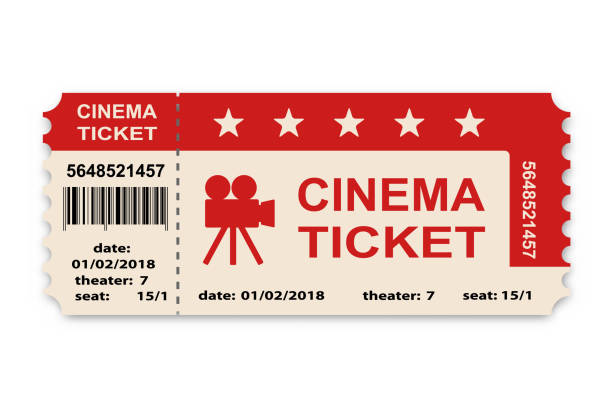

## <center><font color='black'>Introduction </font>
    
This project focuses on finding the high correlational attributes of the movie industry by analyzing a movie data set. 

**Correlation** explains how one or more variables are related to each other, meaning they change together at a constant rate. An example of a correlation would be: **As there are more warm and sunny days, the sales of icecream also increases as well.**
    
For context, *this is not to confuse between causation (as referred to cause and effect).* Causation takes a step further than correlation. **Causation** means that any change in the value of one variable will cause a change in the value of another variable. It involves an action that is making something happen and the result of that action. **An example of causation would be when placing your hand on a hot stove, (the cause) will product a burn (the effect).**
    
In this project, I will be finding the correlation between the features of the movie dataset if any exsist.

## <center><font color='black'>The data set</font>
    
There are 6820 movies listed in this dataset from 1986 to 2016.The data was scraped from the IMDb website, the wrold's most popular source for movies.
    
Here is the link for the IMdb website: 
https://www.imdb.com/   
    
Here is the kaggle link to access the data set: https://www.kaggle.com/danielgrijalvas/movies
    

## <center><font color='black'>Data Dictionary</font>
#### **The movies data set has the following features for each movie:

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released: release date (YYYY-MM-DD)

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

## <center><font color='blue'>Ask</font>
    
It's inevitable that regardless of how impactful and inspiring movies play in society, the obvious and main goal of releasing a movie in the move industry is quite simple: **To make money (gross)**. In addition to a film hoping to gross a large amount of money, it's also mindful to keep the film budget cost down to walk away with a larger gross profit. (**gross** - **budget** = **gross profit**)
    
  
    
At a first glance, skimming over the dataset and it's features, I was curious about the following questions:
    
    - Does a higher budget correlate with higher gross?
    
    - Do observtions regarding score (IMDb user rating) indicate that the gross will also be higher?
    
    - The higher the vote turnout is (more users from IMDb contributing their opinions) will it also correlate with a higher gross?
    
    - Does a more mature rating (R) and/or less mature rating (G) correlate with gross?
    
    - Do movies from the USA (because of globally-known entertainment capital, Hollywood CA) rate higher than movies from other countries?
    

## <center><font color='blue'>Prepare</font>

### Import the Libraries
I'll be using pandas to sort and filter the dataset, numpy to help clean it, and the seaborn and matplotlib libraries to visualize the findings.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6) # Adjusts the configuration of the plots 


### Read in the Movie Data Set
Upload the movie data set csv file into a pandas data frame and call the dataframe df.

In [3]:
df = pd.read_csv('movies.csv', encoding = 'ISO-8859-1')

FileNotFoundError: ignored

### Take a Look at the Data 
Display the first five rows of data to get a feel for the dataframe.

In [ ]:
df.head()

## <center><font color='blue'>Process (Clean data)</font>
    The data will now be cleaned, transformed and organized for proper analyzing.

### Check for missing values
Run a for-loop of the dataframe to iterate over each column and check if any values are missing / null. 

In [ ]:
# For loop to check for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

There are no missing values, as it indicates with 0.0%

### Discover the data types for our columns / features.
Finding the datatypes for the columns will create a deeper understanding whether that datatype will need to be changed or not for a smoother analysis process.

In [ ]:
# Find the data types for our columns
df.dtypes

The data types of the columns are mixes between integers, objects and floats.

### Change the data type of the `budget` and `gross` columns from float to integer.
The `budget` and `gross` columns both have a float datatype. When looking at the observations, each observation ends with a .0. Although this could pass, it is not neccessary to have the decimal present because we are considering millions of dollars in the budget range and gross range, therefore a few cents wouldn't make that drastic of a difference in our analysis. Converting the `budget` and `gross` columns from a float to an integer respectively will also make the column look more tidy.

In [ ]:
# change data types of the gross and budget columns to integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df['rating']= df['rating'].astype('category')
df['rating']= df['rating'].cat.codes

print(df['rating'].dtype)
df.head()

In [ ]:
# display the updated columns as integers
df[['budget', 'gross', 'name', 'rating']].head()

### Drop unncessary columns
The `released` (the year the movie was released) column is similiar to the `year` column. However, the difference is that the `released` column also includes the month and year. This won't be neccessary for the analysis, as month and day won't play a big factor as opposed to the year. Therefore, the column will be dropped.

In [ ]:
# Drop the released column. 

df.drop(['released'], axis='columns', inplace=False).head()

### Drop any duplicate rows in the dataframe
Drop duplicate rows for clean analysis and check the number of rows in the data set to see if anything was actually dropped. 

In [ ]:
# Drop any duplicates rows in the dataframe

df.drop_duplicates()
df.count()


As a result, no rows were dropped.

### Create a new column called `'Gross Profit'` aggregate it, and change the dtype.
Creating this new column will bring more insight for how profitable a movie is regardless of budget size or gross revenue. 
Gross profit will = gross - budget
It is also important to change the dtype for this column, as it will be used as a numerical feature with our correlation heatmap later.

In [ ]:
df['profit'] = df['gross']-df['budget']


df['profit'] = df['profit'].astype('int64')

#check profit column's new dtype
df.dtypes

## <center><font color='blue'>Analyze & Explore</font>
    The data will now be explored to find insights and correlations.

### Check out the highest grossed movies
It appears the highest gross movie is 1. Star Wars, followed by 2. Avatar, 3. Titanic, 4. Jurassic World and the 5.Avengers.

In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

### Check out the most profitable movies
At a glance to make sure it worked.
It appears the highest profitable movie was 1. Star Wars, 2. Avatar, 3. Jurassic World, 4. Titanic, 5. The avengers.
In comparison to the previous cell above, Titanic slipped out of 3rd place to 4th place. It was the third highest grossed movie, but in regards to gross profits, it technically placed 4th. This could be because how large the budget was to make such a film. 

In [ ]:
df.sort_values(by='profit',ascending=False).head()

### Calculate titanic's budget, jurassic world's budget and find the difference.
Turns out there is a 40 million dollar difference. That means Titanic's product company spent a lot more than Jurassic World's production company!

In [ ]:
# locate titanic row
titanic = df.iloc[2420]

# make titanic = the titanic budget column
titanic = titanic['budget']

#locate jurassic world row
jurassic_world= df.iloc[6391]

#make jurassic world = the jurassic world budget column
jurassic_world= jurassic_world['budget']

# take jurassic world's budget and subtract from titanic's budget
budget_difference = titanic-jurassic_world

#print the findings
print("The budget difference between Titanic's budget and Jurassic World's budget is", budget_difference, ', 40 million dollars')


### Group movies by rating to see if there are any insights
We will group each rating and find the highest gross numbers of those ratings. 
Rating G movies have the highest average gross rating (62 million) followed by PG 13 movies (51 million).

In [ ]:
# group the rating column so that the dataframe's movie rows are grouped by rating.
grouped_df = df.groupby("rating")

# find the average of all of the numerical features within the dataframe
mean_df = grouped_df.mean()

#reset values
mean_df = mean_df.reset_index()

#sort the values by gross and the highest gross number starting from the top, working its way down.
mean_df.sort_values('gross',ascending=False)

### Test the data with possible correlations
Now that the data is cleaned and transformed, it is time to see if any features correlate with each other. 



#### <font color='blue'>Budget vs Gross Earnings Correlation</font> 
It appears there is a strong correlation between the two. 

In [ ]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film in Millions')
plt.ylabel('Gross Earnings in Million')
plt.show()

In [ ]:
# Plot budget vs gross using seaborn regression plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

It appears there is a very high correlation between budget and gross

#### <font color='blue'>Budget vs Profit Correlation</font> 
the scatter plots seem to show a slight downward trend in the beginning, however, the regression line shows that as the budget increases drastically, the profits seem to go back up slightly. 

In [ ]:
plt.scatter(x=df['budget'], y=df['profit'])

plt.title('Budget vs Profit')
plt.xlabel('Budget Number(millions)')
plt.ylabel('Profit Earnings (millions)')
plt.show()

In [ ]:
# Show a regression line for budget and profit

sns.regplot(x='budget', y='profit', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#### <font color='blue'>Votes vs Gross Correlation</font> 
The more votes there are on IMDB, does that also mean the grossing earnings tend to rise as well?
Based on the seaborn plot below, it looks like there is somewhat of a strong correlation.

In [ ]:
plt.scatter(x=df['votes'], y=df['gross'])

plt.title('Votes vs Gross Earnings')
plt.xlabel('Vote Number')
plt.ylabel('Gross Earnings in Million')
plt.show()

In [ ]:
# Plot # of Votes vs Gross Earnings using seaborn regression plot

sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

#### <font color='blue'>Score vs Gross Correlation</font>
As the score increases, does that mean the gross increases as well for the movies?

Let's find the average score of all of the 6,000+ movies.
The average score for a movie is 6.3.

It seems based on the seaborn plot that as the score gets higher, there is somewhat of an uptrend and correlation for higher gross.

In [ ]:
# calculate average movie score in database

average = df['score'].mean()
print('the average score is', average)

In [ ]:
sns.regplot(x='score', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [ ]:
sns.regplot(x='score', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

### Calculate Correlations with a correlation matrix.
Now that we have some visualizations, it can be helpful to find out just how well correlated these variables are to eachother in the seaborn plots. We will use the Pearson correlation of all of the numerical fields to investigate the numbers results.

As a recap, here are the for correlations were plotted above:
    - Budget with Gross
    - Budget with Gross Profit
    - Voters with Gross
    - Score with Gross

In [ ]:
# Analyze Pearson correlations of numerical fields

df.corr(method='pearson')


### Visualize the correlation matrix in a heatmap for easier understanding.
All numerical features in the dataset will be plotted in a heatmap to represent the correlated variables. In the heatmap below, the stronger the correlation (a perfect score is 1.0), the lighter the color displayed as a bright, pale beige color. The weaker the correlation (the lowest possible score is 0.0), the darker the color is displayed, black being the weakest correlation.

There is no perfect correlation, because all of the '1' values are correlating with their own variable, easily giving them a perfect score. 

The closet variables with the highest correlations are 
1. budget / gross (.71)
2. gross / profits (.77)
3. votes / gross

It appears the lowest correlation worth noting is budget and profit (.11). Although in our analysis, there seemed to be a trend in the beginning, soon the graph showed that it quickly changed negatively when the budget started to increase. On the heatmap is overall shows a score of .11, suggesting there is a very weak overall correlation between the two. 

In [ ]:
# save the correlation dataframe as a variable called correlation_matrix
correlation_matrix = df.corr(method='pearson')

# create heatmap
sns.heatmap(correlation_matrix, annot=True)

# titles and axis labels
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

### Take ALL variables in the data, change the objects/string's into numerical categories and recreate a heatmap showing all of the correlations between the variables.

All datatypes that were objects are now going to changed to a dtype of category so we can create a numerical value to each unique value. This will help it be displayed on a new heatmap to see if there are any more insights that we are unaware of at this time. 

In [ ]:
# create a copy of new dataframe from the original data frame and assign it to the variable df_numerized.
df_numerized = df

# create a loop that:
# -iterates through all of the column names in the data frames columns, 
# - checks to see if the data frame's column name is an 'object' data type,
# - once it checks, if it is a data type object, change the data type to a category,
# assign category codes to the category values. 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
# check the data type of all columns to make sure we don't have any more objects in the dataframe. 
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        print('fail')
    else:
        print('pass')
        
# display the first five rows of the new dataframe.  

print(df_numerized).head()

### Create a new chart showing numerical values in the pearson correlation. 

In [ ]:
df_numerized.corr(method='pearson')

In [ ]:
# Show every field with a numerical representation of it

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [ ]:
# show the correlation in a dataframe
df_numerized.corr()

### Show the correlation pairs unstacked.

In [ ]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

### Sort the correlation values from highest to lowest

In [ ]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

### Retrieve features that have a pearson correlation GREATER than 0.5 and under .99
Now that heavy analysis and visualization is completed, it is time to show the results of the greatest correlations. We will display all correlations above 0.5 and all correlations under .99 to weed out the perfect 1.0 scores.

In [ ]:
# Show the entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

# retrieve features that having a pearson correlation greater than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr.sort_values(ascending = False)


# in addition, retrieve features that have a pearson correlation < .99
# to filter out similar year columns.
high_corr = sorted_pairs[(sorted_pairs) < .99]
high_corr = high_corr.sort_values(ascending = False)


high_corr.sort_values(ascending=False)

## <center><font color='blue'>Share and Conclusion</font>
    After preparing, loading, process, aggregating, cleaning, analyzing and visualizing the data, we can infer the answer to the questions in the begging of the project:
    
    - There IS a high correlation between budget and gross.(.71)
    
    - There is not an apparent correlation between a movie score and gross. (.17)
    
    - There somewhat a strong correlation between voter/user turnout on IMDb and gross (.66)
    
    - Rated G movies correlation with high profit.
    